1. Завантажте набір даних. Скільки всього записів у ряді?

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

plt.rcParams['figure.figsize'] = (15, 5)

data = pd.read_csv("./Month_Value.csv")
# print(len(data))
data.shape



(64, 2)

2. Виведіть заголовок та останні 5 записів таблиці.

In [2]:
data.head()

,Period,Sales_quantity
0,01.01.2015,12729.0
1,01.02.2015,11636.0
2,01.03.2015,15922.0
3,01.04.2015,15227.0
4,01.05.2015,8620.0


In [3]:

data.tail()

,Period,Sales_quantity
59,01.12.2019,38069.0
60,01.01.2020,27184.0
61,01.02.2020,23509.0
62,01.03.2020,32569.0
63,01.04.2020,26615.0


3. Побудуйте графік часового ряду.

<AxesSubplot:>

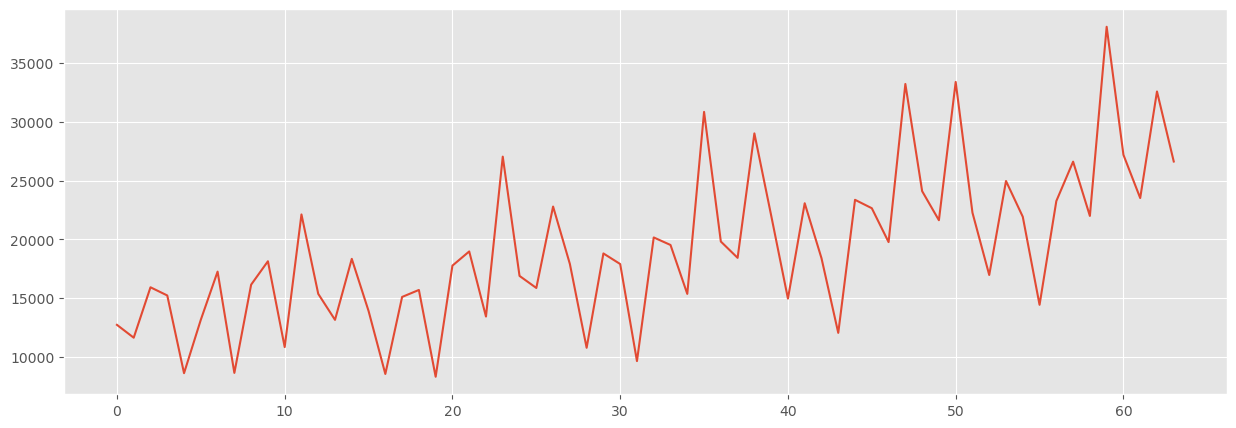

In [4]:
data.iloc[:,1].plot()

4. Проаналізуйте ряд, відповівши на 4 питання:
a. Чи є тренд?
b. Чи є сезонність?
c. Чи змінює ряд свій характер?
d. Чи є викиди або пропущені дані?

a. Ряд має зростаючий лінійний тренд
b. Ряд має мультиплікативну сезонність
c. Ряд не змінює свій характер
d. Викидів або пропущених значень немає

5. Виконайте перетворення даних для формування навчальної таблиці.

In [5]:
data['log_y'] = np.log(data["Sales_quantity"])

6. Розділіть дані на предиктори Х та цілі Y.

In [6]:
data2 = pd.DataFrame()

for i in range(10,0,-1):
    data2['t-'+str(i)] = data.iloc[:,2].shift(i)

data2['t'] = data.iloc[:,2].values

print(data2.head(11))

        t-10       t-9       t-8       t-7       t-6       t-5       t-4  \
0        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4        NaN       NaN       NaN       NaN       NaN       NaN  9.451638   
5        NaN       NaN       NaN       NaN       NaN  9.451638  9.361859   
6        NaN       NaN       NaN       NaN  9.451638  9.361859  9.675457   
7        NaN       NaN       NaN  9.451638  9.361859  9.675457  9.630825   
8        NaN       NaN  9.451638  9.361859  9.675457  9.630825  9.061840   
9        NaN  9.451638  9.361859  9.675457  9.630825  9.061840  9.484937   
10  9.451638  9.361859  9.675457  9.630825  9.061840  9.484937  9.755799   

         t-3       t-2       t-1         t  
0        NaN       NaN       NaN  9.451638

7. Сформуйте навчальну та тестову множини.

In [7]:
data4 = data2[10:]

data4.head()

,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
10,9.451638,9.361859,9.675457,9.630825,9.061840,9.484937,9.755799,9.064389,9.689304,9.805599,9.291091
11,9.361859,9.675457,9.630825,9.061840,9.484937,9.755799,9.064389,9.689304,9.805599,9.291091,10.003921
12,9.675457,9.630825,9.061840,9.484937,9.755799,9.064389,9.689304,9.805599,9.291091,10.003921,9.639847
13,9.630825,9.061840,9.484937,9.755799,9.064389,9.689304,9.805599,9.291091,10.003921,9.639847,9.484405
14,9.061840,9.484937,9.755799,9.064389,9.689304,9.805599,9.291091,10.003921,9.639847,9.484405,9.816785


In [8]:
# Цілі -  вектор y
y = data4['t']
# Предиктори - таблиця X
X = data4.drop('t', axis=1)

In [9]:
data4.shape

(54, 11)

In [10]:
X_train = X[:44]
y_train = y[:44]
X_test  = X[44:]
y_test  = y[44:]
print(data4.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(54, 11)
(44, 10)
(44,)
(10, 10)
(10,)


In [11]:
X_train.head()

,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
10,9.451638,9.361859,9.675457,9.630825,9.061840,9.484937,9.755799,9.064389,9.689304,9.805599
11,9.361859,9.675457,9.630825,9.061840,9.484937,9.755799,9.064389,9.689304,9.805599,9.291091
12,9.675457,9.630825,9.061840,9.484937,9.755799,9.064389,9.689304,9.805599,9.291091,10.003921
13,9.630825,9.061840,9.484937,9.755799,9.064389,9.689304,9.805599,9.291091,10.003921,9.639847
14,9.061840,9.484937,9.755799,9.064389,9.689304,9.805599,9.291091,10.003921,9.639847,9.484405


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

8. Створіть та навчіть нейронну мережу для прогнозування.

In [13]:
# Створюємо модель
model = Sequential()
model.add(Dense(8, input_dim=10, activation='relu'))
model.add(Dense(1, activation='linear'))

# Компілюємо модель
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])

# Навчаємо модель
model.fit(X_train, y_train, epochs=300, batch_size=None)

Epoch 1/300
2/2 [==============================] - 0s 2ms/step - loss: 15.5898 - mean_absolute_percentage_error: 40.2897
Epoch 2/300
2/2 [==============================] - 0s 3ms/step - loss: 10.5106 - mean_absolute_percentage_error: 33.0448
Epoch 3/300
2/2 [==============================] - 0s 4ms/step - loss: 6.4841 - mean_absolute_percentage_error: 25.9140
Epoch 4/300
2/2 [==============================] - 0s 4ms/step - loss: 3.5407 - mean_absolute_percentage_error: 19.0392
Epoch 5/300
2/2 [==============================] - 0s 988us/step - loss: 1.5495 - mean_absolute_percentage_error: 12.5236
Epoch 6/300
2/2 [==============================] - 0s 2ms/step - loss: 0.4697 - mean_absolute_percentage_error: 6.5541
Epoch 7/300
2/2 [==============================] - 0s 2ms/step - loss: 0.0640 - mean_absolute_percentage_error: 1.9091
Epoch 8/300
2/2 [==============================] - 0s 2ms/step - loss: 0.1367 - mean_absolute_percentage_error: 3.3012
Epoch 9/300
2/2 [======================

2/2 [==============================] - 0s 2ms/step - loss: 0.0413 - mean_absolute_percentage_error: 1.6967
Epoch 70/300
2/2 [==============================] - 0s 2ms/step - loss: 0.0413 - mean_absolute_percentage_error: 1.7008
Epoch 71/300
2/2 [==============================] - 0s 3ms/step - loss: 0.0413 - mean_absolute_percentage_error: 1.7020
Epoch 72/300
2/2 [==============================] - 0s 2ms/step - loss: 0.0413 - mean_absolute_percentage_error: 1.7030
Epoch 73/300
2/2 [==============================] - 0s 1ms/step - loss: 0.0414 - mean_absolute_percentage_error: 1.7039
Epoch 74/300
2/2 [==============================] - 0s 997us/step - loss: 0.0415 - mean_absolute_percentage_error: 1.7048
Epoch 75/300
2/2 [==============================] - 0s 2ms/step - loss: 0.0413 - mean_absolute_percentage_error: 1.6964
Epoch 76/300
2/2 [==============================] - 0s 1ms/step - loss: 0.0413 - mean_absolute_percentage_error: 1.6966
Epoch 77/300
2/2 [==============================] -

Epoch 137/300
2/2 [==============================] - 0s 1ms/step - loss: 0.0409 - mean_absolute_percentage_error: 1.6856
Epoch 138/300
2/2 [==============================] - 0s 3ms/step - loss: 0.0409 - mean_absolute_percentage_error: 1.6887
Epoch 139/300
2/2 [==============================] - 0s 1ms/step - loss: 0.0411 - mean_absolute_percentage_error: 1.6887
Epoch 140/300
2/2 [==============================] - 0s 1ms/step - loss: 0.0409 - mean_absolute_percentage_error: 1.6864
Epoch 141/300
2/2 [==============================] - 0s 2ms/step - loss: 0.0409 - mean_absolute_percentage_error: 1.6920
Epoch 142/300
2/2 [==============================] - 0s 2ms/step - loss: 0.0410 - mean_absolute_percentage_error: 1.6939
Epoch 143/300
2/2 [==============================] - 0s 1ms/step - loss: 0.0410 - mean_absolute_percentage_error: 1.7014
Epoch 144/300
2/2 [==============================] - 0s 1ms/step - loss: 0.0411 - mean_absolute_percentage_error: 1.7020
Epoch 145/300
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.0408 - mean_absolute_percentage_error: 1.7007
Epoch 205/300
2/2 [==============================] - 0s 1ms/step - loss: 0.0405 - mean_absolute_percentage_error: 1.6888
Epoch 206/300
2/2 [==============================] - 0s 2ms/step - loss: 0.0407 - mean_absolute_percentage_error: 1.6775
Epoch 207/300
2/2 [==============================] - 0s 1ms/step - loss: 0.0405 - mean_absolute_percentage_error: 1.6660
Epoch 208/300
2/2 [==============================] - 0s 1ms/step - loss: 0.0406 - mean_absolute_percentage_error: 1.6616
Epoch 209/300
2/2 [==============================] - 0s 2ms/step - loss: 0.0406 - mean_absolute_percentage_error: 1.6586
Epoch 210/300
2/2 [==============================] - 0s 1ms/step - loss: 0.0404 - mean_absolute_percentage_error: 1.6700
Epoch 211/300
2/2 [==============================] - 0s 1ms/step - loss: 0.0404 - mean_absolute_percentage_error: 1.6846
Epoch 212/300
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0400 - mean_absolute_percentage_error: 1.6863
Epoch 272/300
2/2 [==============================] - 0s 2ms/step - loss: 0.0404 - mean_absolute_percentage_error: 1.6666
Epoch 273/300
2/2 [==============================] - 0s 2ms/step - loss: 0.0404 - mean_absolute_percentage_error: 1.6458
Epoch 274/300
2/2 [==============================] - 0s 996us/step - loss: 0.0405 - mean_absolute_percentage_error: 1.6517
Epoch 275/300
2/2 [==============================] - 0s 1ms/step - loss: 0.0401 - mean_absolute_percentage_error: 1.6521
Epoch 276/300
2/2 [==============================] - 0s 3ms/step - loss: 0.0399 - mean_absolute_percentage_error: 1.6593
Epoch 277/300
2/2 [==============================] - 0s 1ms/step - loss: 0.0399 - mean_absolute_percentage_error: 1.6683
Epoch 278/300
2/2 [==============================] - 0s 2ms/step - loss: 0.0399 - mean_absolute_percentage_error: 1.6795
Epoch 279/300
2/2 [=========================

In [14]:
scores = model.evaluate(X_test, y_test)
print("\n rude MAPE: %.2f%%" % (scores[1]))

1/1 [==============================] - 0s 3ms/step - loss: 0.0315 - mean_absolute_percentage_error: 1.4296

 rude MAPE: 1.43%


9. Отримайте грубу оцінку роботи мережі на тестових даних.

In [15]:
false_predictions = model.predict(X_test)

In [16]:
def make_prediction(X_predict, nb_of_predictions):

    predictions = np.array([])

    for i in range (nb_of_predictions):

        y_predicted = model.predict(X_predict)
        predictions = np.append(predictions, y_predicted)
    
        X_predict = np.roll(X_predict, -1)
        X_predict[0][-1] = y_predicted
    
    return predictions

In [17]:
# Перетворимо перший зразок із тестової вибірки на масив Numpy
X_predict = np.array(X_test[:1])

# Використаємо написану функцію для отримання правильного прогнозу
predictions = make_prediction(X_predict, len(X_test))

10. Отримайте реальну оцінку роботи мережі на тестових даних.

In [18]:
y_test = np.array(y_test)

MAPE = 100*sum(np.abs(y_test - predictions) / np.maximum(y_test, 1e-20))/len(y_test)
print(f"\n MAPE: {MAPE:.2f} %")


 MAPE: 1.16 %


In [19]:
predictions_train = model.predict(X_train)

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(44, 10)
(44,)
(10, 10)
(10,)


11. Побудуйте суміщений графік, на якому має бути відображено:

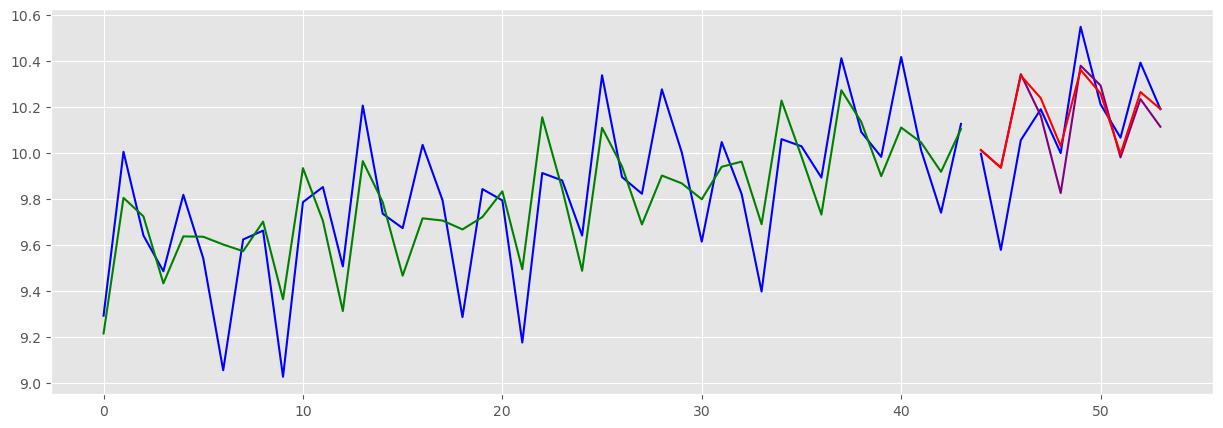

In [21]:
# Графік з результатами

plt.rcParams['figure.figsize'] = (15, 5)

#   numpy.arange([start, ]stop, [step, ]dtype=None)

x2 = np.arange(0, 44, 1)

x3 = np.arange(44, 54, 1)

# реальні дані (початковий ряд без відкинутих і тестових значень)
plt.plot(x2, y_train, color='blue')

# підгонка
plt.plot(x2, predictions_train, color='green')

# реальні дані на тестовій множині
plt.plot(x3, y_test, color='blue')

# грубий прогноз на тестовій множині
plt.plot(x3, false_predictions, color='purple')

# правильний прогноз на тестовій множині
plt.plot(x3, predictions, color='red')

12. Використайте навчену мережу для отримання прогнозу на вказаний
термін часу.

In [23]:
# Прогнозуємо на 5 місяців вперед
nb_of_predictions = 5

# Перетворюємо дані за останні 10 місяців в масиви Numpy
X_real_prediction = np.array(data4.iloc[-X.shape[1]:,1])
X_real_prediction = np.expand_dims(X_real_prediction, axis = 1)
X_real_prediction = np.transpose(X_real_prediction)

# Робимо прогноз
real_predictions = make_prediction(X_real_prediction, nb_of_predictions)

13.Побудуйте суміщений графік початкового ряду та прогнозу.

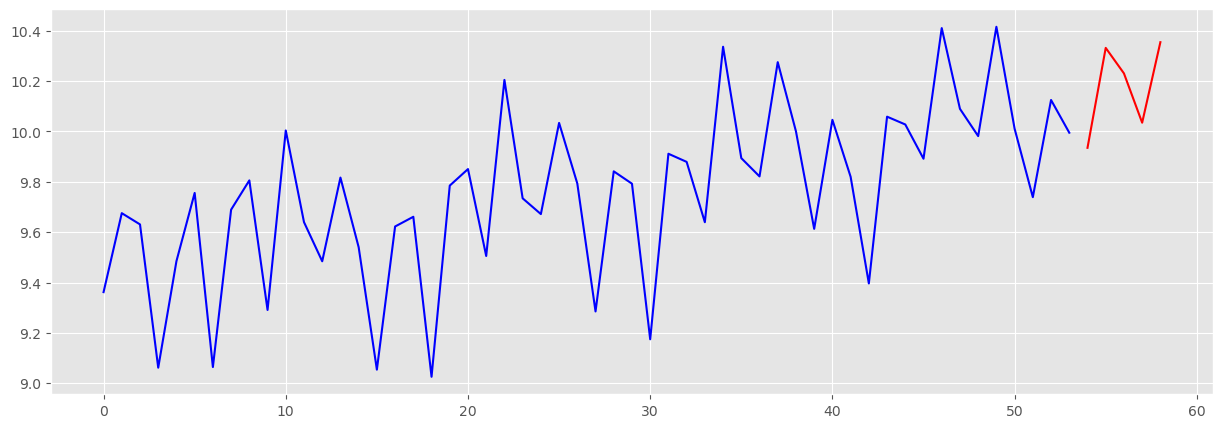

In [24]:
# Данi з початкового ряду
x_past = np.arange(0, len(data4))
y_past = data4.iloc[:,1]

# Додаємо координати Х для прогнозу
x_pred = np.arange(len(data4), len(data4) + nb_of_predictions)

# Початковий ряд
plt.plot(x_past, y_past, color='blue')

# Прогноз
plt.plot(x_pred, real_predictions, color='red')

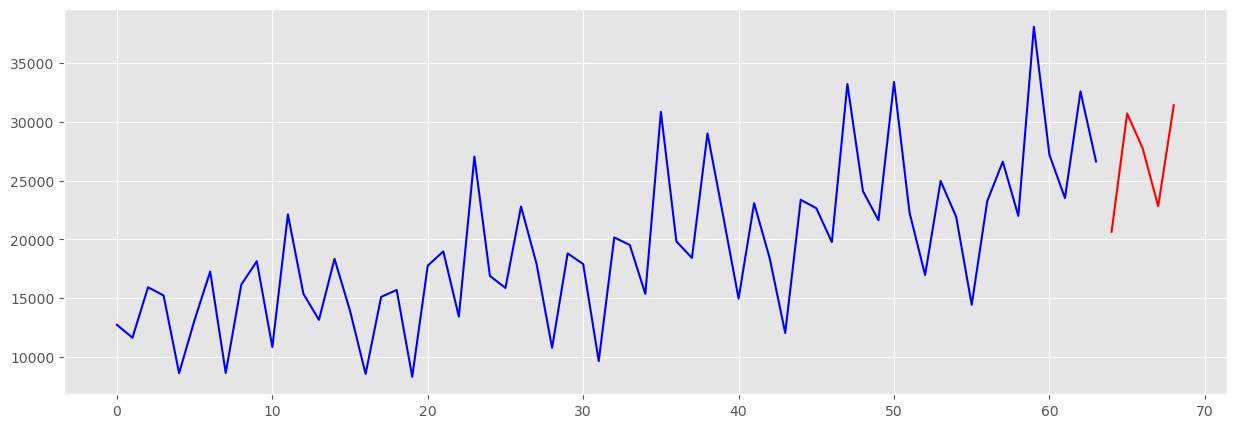

In [28]:
# Перетворюємо з логарифмів до реальної величини
non_log_predictions = np.e**real_predictions
x_past = np.arange(0, len(data))
y_past = data.iloc[:,1]

x_pred = np.arange(len(data), len(data) + nb_of_predictions)

plt.plot(x_past, y_past, color='blue')
plt.plot(x_pred, non_log_predictions, color='red')